In [26]:
import torch
# torch.__version__

In [1]:
import pandas as pd
file=pd.read_pickle('Data/pickle_file/Class_Error1.pkl')
file2=pd.read_pickle('Data/pickle_file/Class_Error2.pkl')
file3=pd.read_pickle('Data/pickle_file/Class_Error3.pkl')

In [2]:
len(file), len(file2), len(file3)

(43, 62, 28)

In [1]:
import cv2 
import os.path as osp
import os
def extract_frame(video_path):
    dname = 'temp'
    os.makedirs(dname, exist_ok=True)
    frame_tmpl = osp.join(dname, 'img_{:05d}.jpg')
    cap = cv2.VideoCapture(video_path)
    frame_paths = []
    cnt = 0
    while(cap.isOpened()):
        flag, frame = cap.read()
        if flag:
            frame_path = frame_tmpl.format(cnt + 1)
            frame_paths.append(frame_path)

            cv2.imwrite(frame_path, frame)
            cnt += 1
            
    return frame_paths


In [2]:
# fp=extract_frame('C:/Users/ADMIN/Videos/Desktop/Desktop 2023.02.10 - 21.10.59.01.mp4')

In [1]:
from mmdet.apis import inference_detector, init_detector
from mmpose.apis import inference_top_down_pose_model, init_pose_model,process_mmdet_results,vis_pose_result
import mmcv
import numpy as np
import shutil
# pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
# pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
# det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
# det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
#############################
# pose_config = 'Pose/hrnet_w48_coco_256x192.py'
# pose_checkpoint = 'Pose/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
###############
pose_config = 'mmpose/configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'Pose/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
###########
# det_config = 'Pose/yolox_s_8x8_300e_coco.py'
# det_checkpoint = 'Pose/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth'
##############
det_config = 'mmdetection/configs/yolox/yolox_s_8x8_300e_coco.py'
det_checkpoint = 'Pose/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)
img = 'mmpose/tests/data/coco/000000196141.jpg'

c:\Users\PhuTuan\anaconda3\envs\pythonProject\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\PhuTuan\anaconda3\envs\pythonProject\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


load checkpoint from local path: Pose/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from local path: Pose/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth


In [2]:
img = 'temp/img_00050.jpg'
mmdet_results = inference_detector(det_model, img)
person_results = process_mmdet_results(mmdet_results, cat_id=1)
pose_results= inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.8,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type,
    )[0]

c:\Users\PhuTuan\anaconda3\envs\pythonProject\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


TypeError: list indices must be integers or slices, not str

In [6]:
mmdet_results = inference_detector(det_model, img)
a=mmdet_results[0]
# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
anno=[]
pose_results= inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.8,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type,
    )[0]

# show pose estimation results
# vis_result = vis_pose_result(
#     pose_model,
#     img,
#     pose_results,
#     dataset=pose_model.cfg.data.test.type,
#     show=False)

In [5]:
len(person_results)

19

In [10]:
anno = dict()
anno['keypoint'] = pose_results[..., :2]

TypeError: list indices must be integers or slices, not tuple

In [50]:
# bbox_sorted=[]
# index_bbox=[]
# Area_bbox=[]
# for index,person_result in enumerate(pose_results):
#     if person_result['bbox'][-1]>0.5: 
#         bbox_sorted.append(dict(bbox=person_result['bbox']))
#         index_bbox.append(index)
#         Width=person_result['bbox'][2]-person_result['bbox'][0]
#         Height=person_result['bbox'][3]-person_result['bbox'][1]
#         Area_bbox.append(Width*Height)

In [28]:
filterlist=[]
for person in pose_results:
    W = person['bbox'][2] - person['bbox'][0]
    H = person['bbox'][3] - person['bbox'][1]
    conf  = person['bbox'][4]
    Area = H*W
    filterlist.append(Area)
tensorfilter=torch.tensor([filterlist])

In [66]:
# _,indexmax=torch.max(torch.tensor([filterlist]),dim=1)
# indexmax
newlist=[pose_results[0],pose_results[1]]

In [5]:
pose_results

[{'bbox': array([ 90.475555  ,  60.896683  , 159.33734   , 355.12567   ,
           0.88798976], dtype=float32),
  'keypoints': array([[1.14849792e+02, 8.87679749e+01, 9.55384135e-01],
         [1.17723129e+02, 8.30213318e+01, 9.29654717e-01],
         [1.17723129e+02, 8.30213318e+01, 7.45281100e-01],
         [1.26343094e+02, 8.87679749e+01, 9.77392912e-01],
         [1.40709763e+02, 9.16412964e+01, 7.27286339e-01],
         [1.17723129e+02, 1.23247955e+02, 9.07062411e-01],
         [1.43583084e+02, 1.28994598e+02, 8.01408768e-01],
         [9.76098175e+01, 1.77841217e+02, 9.32981133e-01],
         [1.06229813e+02, 1.74967896e+02, 3.92593980e-01],
         [1.00483139e+02, 1.60601257e+02, 4.90277886e-01],
         [1.06229813e+02, 1.54854584e+02, 3.67447913e-01],
         [1.26343094e+02, 2.35307800e+02, 7.62161970e-01],
         [1.43583084e+02, 2.32434509e+02, 7.33023167e-01],
         [1.26343094e+02, 3.15761047e+02, 7.96369314e-01],
         [1.40709763e+02, 3.15761047e+02, 8.4663

In [3]:
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    show=False)

In [17]:
len(pose_results)

4

In [47]:
# vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)
# # cv2.imshow(vis_result)

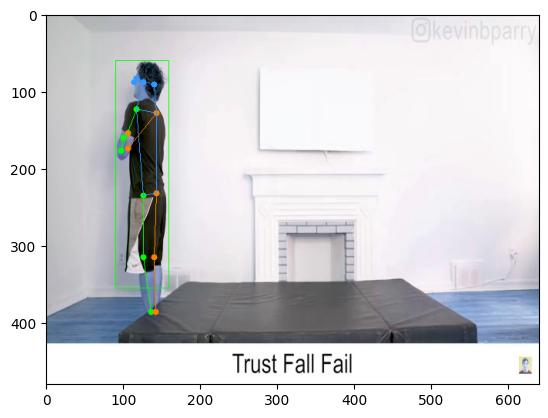

In [4]:
import matplotlib.pyplot  as plt
plt.imshow(vis_result)

In [ ]:
def detection_inference(det_config, det_checkpoint ,frame_paths, det_score_thr=0.5,device='cuda' ):
    model = init_detector(det_config, det_checkpoint, device)
    assert model.CLASSES[0] == 'person', ('We require you to use a detector '
                                          'trained on COCO')
    results = []
    print('Performing Human Detection for each frame')
    prog_bar = mmcv.ProgressBar(len(frame_paths))
    for frame_path in frame_paths:
        result = inference_detector(model, frame_path)
        # We only keep human detections with score larger than det_score_thr
        result = result[0][result[0][:, 4] >= det_score_thr]
        results.append(result)
        prog_bar.update()
    return results

def pose_inference(pose_config,pose_checkpoint, frame_paths, det_results, device='cuda'):
    model = init_pose_model(pose_config, pose_checkpoint, device)
    print('Performing Human Pose Estimation for each frame')
    prog_bar = mmcv.ProgressBar(len(frame_paths))

    num_frame = len(det_results)
    num_person = max([len(x) for x in det_results])
    kp = np.zeros((num_person, num_frame, 17, 3), dtype=np.float32)

    for i, (f, d) in enumerate(zip(frame_paths, det_results)):
        # Align input format
        d = [dict(bbox=x) for x in list(d) if x[-1] > 0.5]
        pose = inference_top_down_pose_model(model, f, d, format='xyxy')[0]
        for j, item in enumerate(pose):
            kp[j, i] = item['keypoints']
        prog_bar.update()
    return kp


def ntu_pose_extraction(vid,det_config, det_checkpoint,pose_config,pose_checkpoint,label, det_score_thr=0.5,device='cuda'):
    frame_paths = extract_frame(vid)
    det_results = detection_inference(det_config, det_checkpoint ,frame_paths, det_score_thr,device)
    image = cv2.imread(frame_paths[0])
    image_shape = (image.shape[0], image.shape[1])
    pose_results = pose_inference(pose_config,pose_checkpoint, frame_paths, det_results, device)
    anno = dict()
    anno['keypoint'] = pose_results[..., :2]
    anno['keypoint_score'] = pose_results[..., 2]
    anno['frame_dir'] = osp.splitext(osp.basename(vid))[0]
    anno['img_shape'] = image_shape
    anno['original_shape'] = image_shape
    anno['total_frames'] = pose_results.shape[1]
    anno['label'] = label
    shutil.rmtree(osp.dirname(frame_paths[0]))
    return anno